In [1]:
!pip install shap

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
import shap

In [3]:
X,y= shap.datasets.adult()
X_display,y_display=shap.datasets.adult(display=True)
features=X.columns
features

Index(['Age', 'Workclass', 'Education-Num', 'Marital Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Country'],
      dtype='object')

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581646,3.868892,10.080679,2.611836,6.572740,2.494518,3.665858,0.669205,1077.649170,87.303833,40.437454,36.718866
std,13.640442,1.455960,2.572562,1.506222,4.228857,1.758232,0.848806,0.470506,7385.911621,403.014771,12.347933,7.823782
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,3.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,4.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


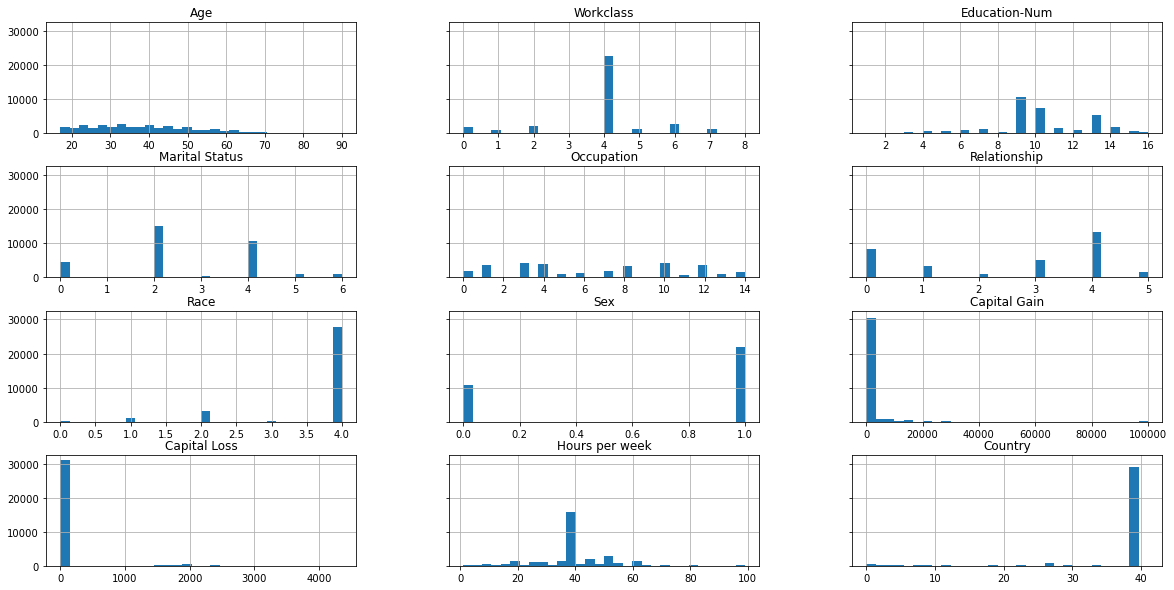

In [4]:
display(X.describe())
hist=X.hist(bins=30, sharey=True, figsize=(20,10))

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
x_train_display=X_display.loc[x_train.index]

In [6]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)
x_train_display=X_display.loc[x_train.index]
x_val_display=X_display.loc[x_val.index]

In [7]:
import pandas as pd

train=pd.concat([pd.Series(y_train,index=x_train.index,name='Income>50K',dtype=int),x_train],axis=1)

val=pd.concat([pd.Series(y_val,index=x_val.index,name='Income>50K',dtype=int),x_val],axis=1)

test=pd.concat([pd.Series(y_test,index=x_test.index,name='Income>50K',dtype=int),x_test],axis=1)

In [8]:
train

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
20771,0,23.0,4,9.0,4,1,3,4,1,0.0,0.0,40.0,39
13881,1,38.0,4,9.0,2,4,4,4,1,0.0,0.0,44.0,39
14065,0,38.0,4,10.0,5,8,0,4,0,0.0,0.0,58.0,39
2448,0,29.0,2,9.0,4,11,0,2,0,0.0,0.0,40.0,39
15595,1,48.0,6,14.0,2,4,4,4,1,0.0,0.0,40.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17294,0,41.0,4,9.0,2,7,4,4,1,0.0,0.0,45.0,39
18399,0,39.0,5,13.0,2,12,4,4,1,0.0,0.0,40.0,39
7731,0,37.0,4,9.0,2,6,4,4,1,0.0,0.0,24.0,39
28246,1,47.0,6,10.0,2,13,4,2,1,0.0,0.0,40.0,39


In [9]:
val

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
29286,0,38.0,4,4.0,2,1,4,4,1,0.0,0.0,40.0,39
21648,0,69.0,0,4.0,2,0,4,4,1,0.0,0.0,48.0,39
26774,0,37.0,4,2.0,4,8,1,4,0,0.0,0.0,48.0,8
13333,0,23.0,4,13.0,4,10,3,4,0,0.0,0.0,40.0,39
8654,0,30.0,4,9.0,4,11,0,4,1,0.0,0.0,99.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7354,0,60.0,4,12.0,2,1,4,4,1,0.0,0.0,24.0,39
24435,1,52.0,4,9.0,2,12,4,4,1,0.0,0.0,40.0,39
17049,1,50.0,4,9.0,2,3,4,4,1,0.0,0.0,40.0,39
24612,0,22.0,4,9.0,4,5,0,4,1,0.0,0.0,50.0,39


In [10]:
test

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
14160,0,27.0,4,10.0,0,1,0,4,0,0.0,0.0,38.0,39
27048,0,45.0,7,9.0,2,4,5,4,0,0.0,0.0,40.0,39
28868,1,29.0,4,13.0,2,4,4,2,1,0.0,0.0,55.0,39
5667,0,30.0,4,13.0,4,7,0,4,0,0.0,0.0,40.0,39
7827,0,29.0,6,10.0,0,3,0,4,1,2202.0,0.0,50.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,0,71.0,4,13.0,0,13,3,4,0,2329.0,0.0,16.0,39
24534,1,55.0,2,10.0,2,10,4,4,1,0.0,0.0,40.0,39
18080,1,47.0,4,15.0,2,10,4,4,1,99999.0,0.0,48.0,39
10354,0,27.0,4,13.0,4,1,0,4,0,0.0,0.0,40.0,39


In [11]:
train.to_csv('train.csv',index=False,header=False)
val.to_csv('val.csv',index=False,header=False)

In [12]:
import sagemaker
import boto3
import os

In [19]:
bucket='project2-aks-bucket'
s3 = boto3.resource('s3')
s3.create_bucket(Bucket=bucket)

s3.Bucket(name='project2-aks-bucket')

In [20]:
prefix='Project2-sagemaker-xgboost-income-prediction'
boto3.Session().resource('s3').Bucket(bucket).Object(
os.path.join(prefix,'data/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(
os.path.join(prefix,'data/val.csv')).upload_file('val.csv')

In [21]:
!aws s3 ls {bucket}/{prefix}/data --recursive

2021-11-21 05:53:24     838442 Project2-sagemaker-xgboost-income-prediction/data/train.csv
2021-11-21 05:53:24     209715 Project2-sagemaker-xgboost-income-prediction/data/val.csv


In [22]:
region=sagemaker.Session().boto_region_name
print('AWS Region: {}'.format(region))

role=sagemaker.get_execution_role()
print('RoleArn: {}'.format(role))

AWS Region: us-east-1
RoleArn: arn:aws:iam::992225393738:role/service-role/AmazonSageMaker-ExecutionRole-20211121T105105


In [23]:
sagemaker.__version__

'2.68.0'

In [24]:
from sagemaker.debugger import Rule, rule_configs
from sagemaker.session import TrainingInput

s3_output_location='s3://{}/{}/{}'.format(bucket,prefix,'xgboost_model')

container=sagemaker.image_uris.retrieve('xgboost', region, '1.2-1')
print(container)

xgb_model=sagemaker.estimator.Estimator(
    image_uri=container, role=role, instance_count=1,
    instance_type='ml.m4.xlarge', volume_size=5,
    output_path=s3_output_location, sagemaker_session=sagemaker.Session(),
    rules=[Rule.sagemaker(rule_configs.create_xgboost_report())])

683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-xgboost:1.2-1


In [25]:
xgb_model.set_hyperparameters(
    max_depth=5, eta=0.2,
    gamma=4, min_child_weight=6,
    subsample=0.7, objective='binary:logistic',
    num_round=100)

In [26]:
train_input=TrainingInput(
    's3://{}/{}/{}'.format(bucket,prefix,'data/train.csv'),content_type='csv')
val_input=TrainingInput(
    's3://{}/{}/{}'.format(bucket,prefix,'data/val.csv'),content_type='csv')

In [27]:
xgb_model.fit({'train':train_input,'validation':val_input},wait=True)

2021-11-21 06:27:26 Starting - Starting the training job...
2021-11-21 06:27:49 Starting - Launching requested ML instancesCreateXgboostReport: InProgress
ProfilerReport-1637476046: InProgress
......
2021-11-21 06:28:50 Starting - Preparing the instances for training............
2021-11-21 06:30:50 Downloading - Downloading input data......
2021-11-21 06:31:51 Training - Downloading the training image...
2021-11-21 06:32:21 Uploading - Uploading generated training model[2021-11-21 06:32:14.343 ip-10-0-164-189.ec2.internal:1 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','

In [28]:
rule_output_path=xgb_model.output_path +'/'+xgb_model.latest_training_job.name + '/rule_output'
!aws s3 ls {rule_output_path} --recursive

In [29]:
!aws s3 cp {rule_output_path} ./ --recursive

In [31]:
from IPython.display import  FileLink, FileLinks

display('Click Link below to view XGBoost Training report', FileLink('CreateXGboostReport/xgboost_report.html'))

'Click Link below to view XGBoost Training report'

/home/ec2-user/SageMaker/CreateXGboostReport/xgboost_report.html

In [33]:
profiler_name=[rule['RuleConfigurationName']
              for rule in xgb_model.latest_training_job.rule_job_summary()
              if 'Profiler' in rule['RuleConfigurationName']][0]
profiler_name
display('Click Link below to view profiler report', FileLink(profiler_name+"/profiler_output/profiler-report.html"))

'Click Link below to view profiler report'

/home/ec2-user/SageMaker/ProfilerReport-1637476046/profiler_output/profiler-report.html

In [34]:
xgb_model.model_data

's3://project2-aks-bucket/Project2-sagemaker-xgboost-income-prediction/xgboost_model/sagemaker-xgboost-2021-11-21-06-27-26-108/output/model.tar.gz'

In [36]:
from sagemaker.serializers import CSVSerializer

xgb_predictor=xgb_model.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium',
    serializer=CSVSerializer())

-------------!

In [37]:
xgb_predictor.endpoint_name

'sagemaker-xgboost-2021-11-21-06-45-21-496'

In [38]:
import numpy as np

def predict(data, rows=1000):
    split_array=np.array_split(data,int(data.shape[0]/float(rows)+1))
    predictions=''
    for array in split_array:
        predictions=','.join([predictions,xgb_predictor.predict(array).decode('utf-8')])
    return np.fromstring(predictions[1:],sep=',')

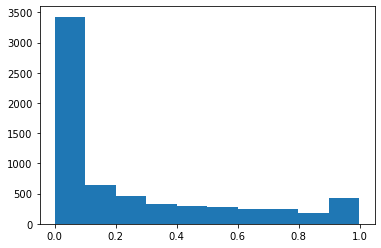

In [39]:
import matplotlib.pyplot as plt

predictions=predict(test.to_numpy()[:,1:])
plt.hist(predictions)
plt.show()

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
cutoff=0.5
print(confusion_matrix(test.iloc[:,0],np.where(predictions>cutoff,1,0)))
print(classification_report(test.iloc[:,0],np.where(predictions>cutoff,1,0)))

[[4637  305]
 [ 513 1058]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4942
           1       0.78      0.67      0.72      1571

    accuracy                           0.87      6513
   macro avg       0.84      0.81      0.82      6513
weighted avg       0.87      0.87      0.87      6513



In [48]:
from sklearn.metrics import log_loss

cutoffs = np.arange(0.01,1,0.01)
lg_ls=[]
for c in cutoffs:
    lg_ls.append(log_loss(test.iloc[:,0],np.where(predictions>c,1,0)))

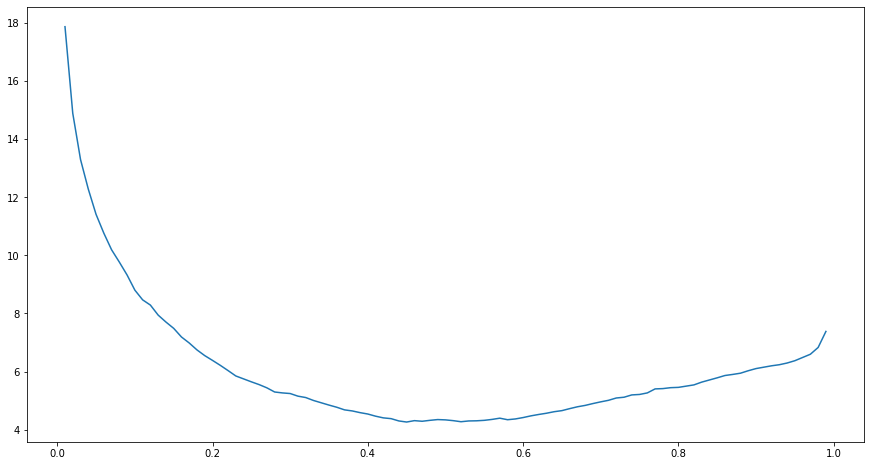

In [49]:
plt.figure(figsize=(15,8))
plt.plot(cutoffs,lg_ls)
plt.show()

In [50]:
print(
'Log-Loss  is minimized  at cutoff of',cutoffs[np.argmin(lg_ls)],
 ', and the log-loss value at the minimum cutoff is',np.min(lg_ls))

Log-Loss  is minimized  at cutoff of 0.45 , and the log-loss value at the minimum cutoff is 4.263699074552029


In [51]:
from sklearn.metrics import classification_report, confusion_matrix
cutoff=0.45
print(confusion_matrix(test.iloc[:,0],np.where(predictions>cutoff,1,0)))
print(classification_report(test.iloc[:,0],np.where(predictions>cutoff,1,0)))

[[4572  370]
 [ 434 1137]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      4942
           1       0.75      0.72      0.74      1571

    accuracy                           0.88      6513
   macro avg       0.83      0.82      0.83      6513
weighted avg       0.87      0.88      0.88      6513



In [52]:
sagemaker.Session().delete_endpoint(xgb_predictor.endpoint)
bucket_to_delete = boto3.resource('s3').Bucket(bucket)
bucket_to_delete.objects.all().delete()

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


[{'ResponseMetadata': {'RequestId': 'NVC3VPH39DXZYDT1',
   'HostId': '7hqrv9uHPyVOxCCJBXvoN4P/rLI16dJgOHmbsYIDQ/9es5lC6imuCFtGhZ80qC9ZRQFiSP2OJZ4=',
   'HTTPStatusCode': 200,
   'HTTPHeaders': {'x-amz-id-2': '7hqrv9uHPyVOxCCJBXvoN4P/rLI16dJgOHmbsYIDQ/9es5lC6imuCFtGhZ80qC9ZRQFiSP2OJZ4=',
    'x-amz-request-id': 'NVC3VPH39DXZYDT1',
    'date': 'Sun, 21 Nov 2021 07:10:12 GMT',
    'content-type': 'application/xml',
    'transfer-encoding': 'chunked',
    'server': 'AmazonS3',
    'connection': 'close'},
   'RetryAttempts': 0},
  'Deleted': [{'Key': 'Project2-sagemaker-xgboost-income-prediction/xgboost_model/sagemaker-xgboost-2021-11-21-06-27-26-108/debug-output/index/000000000/000000000095_worker_0.json'},
   {'Key': 'Project2-sagemaker-xgboost-income-prediction/xgboost_model/sagemaker-xgboost-2021-11-21-06-27-26-108/rule-output/ProfilerReport-1637476046/profiler-output/profiler-reports/LoadBalancing.json'},
   {'Key': 'Project2-sagemaker-xgboost-income-prediction/xgboost_model/sagemaker-